# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [9]:
results = {}
optimizers = ['sgd','RMSprop','AdaGrad','Adam']
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for optimizer in optimizers:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f'{optimizer}'
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 140s 3m

Epoch 49/50
50000/50000 [==============================] - 56s 1ms/step - loss: 1.2440 - accuracy: 0.5657 - val_loss: 1.4652 - val_accuracy: 0.4760
Epoch 50/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.2436 - accuracy: 0.5646 - val_loss: 1.5709 - val_accuracy: 0.4424
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)             

Epoch 47/50
50000/50000 [==============================] - 50s 1ms/step - loss: 0.7932 - accuracy: 0.7141 - val_loss: 2.0153 - val_accuracy: 0.4813
Epoch 48/50
50000/50000 [==============================] - 52s 1ms/step - loss: 0.7888 - accuracy: 0.7144 - val_loss: 1.9666 - val_accuracy: 0.4850
Epoch 49/50
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7722 - accuracy: 0.7210 - val_loss: 1.8606 - val_accuracy: 0.4928
Epoch 50/50
50000/50000 [==============================] - 49s 978us/step - loss: 0.7598 - accuracy: 0.7265 - val_loss: 1.9169 - val_accuracy: 0.4958
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________________________

50000/50000 [==============================] - 112s 2ms/step - loss: 1.1168 - accuracy: 0.6088 - val_loss: 1.4002 - val_accuracy: 0.5086
Epoch 46/50
50000/50000 [==============================] - 101s 2ms/step - loss: 1.1072 - accuracy: 0.6127 - val_loss: 1.3840 - val_accuracy: 0.5162
Epoch 47/50
50000/50000 [==============================] - 89s 2ms/step - loss: 1.1025 - accuracy: 0.6130 - val_loss: 1.4024 - val_accuracy: 0.5099
Epoch 48/50
50000/50000 [==============================] - 82s 2ms/step - loss: 1.0970 - accuracy: 0.6149 - val_loss: 1.3725 - val_accuracy: 0.5213
Epoch 49/50
50000/50000 [==============================] - 72s 1ms/step - loss: 1.0896 - accuracy: 0.6185 - val_loss: 1.3905 - val_accuracy: 0.5193
Epoch 50/50
50000/50000 [==============================] - 64s 1ms/step - loss: 1.0810 - accuracy: 0.6212 - val_loss: 1.4106 - val_accuracy: 0.5104
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Sha

50000/50000 [==============================] - 52s 1ms/step - loss: 0.7458 - accuracy: 0.7344 - val_loss: 1.6835 - val_accuracy: 0.5059
Epoch 44/50
50000/50000 [==============================] - 59s 1ms/step - loss: 0.7240 - accuracy: 0.7419 - val_loss: 1.6535 - val_accuracy: 0.5096
Epoch 45/50
50000/50000 [==============================] - 83s 2ms/step - loss: 0.7346 - accuracy: 0.7376 - val_loss: 1.6882 - val_accuracy: 0.5109
Epoch 46/50
50000/50000 [==============================] - 61s 1ms/step - loss: 0.7101 - accuracy: 0.7463 - val_loss: 1.7350 - val_accuracy: 0.5175
Epoch 47/50
50000/50000 [==============================] - 62s 1ms/step - loss: 0.6934 - accuracy: 0.7524 - val_loss: 1.7020 - val_accuracy: 0.5107
Epoch 48/50
50000/50000 [==============================] - 58s 1ms/step - loss: 0.6881 - accuracy: 0.7540 - val_loss: 1.7264 - val_accuracy: 0.5062
Epoch 49/50
50000/50000 [==============================] - 56s 1ms/step - loss: 0.6744 - accuracy: 0.7604 - val_loss: 1.7681

In [10]:
results.keys()

dict_keys(['sgd', 'RMSprop', 'AdaGrad', 'Adam'])

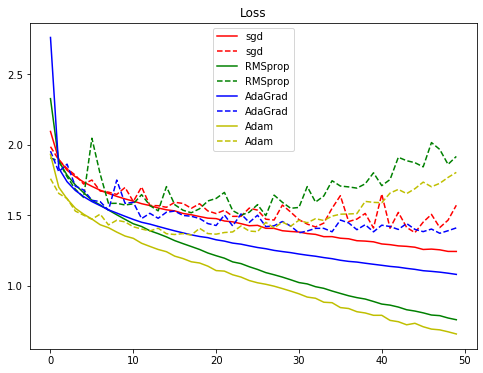

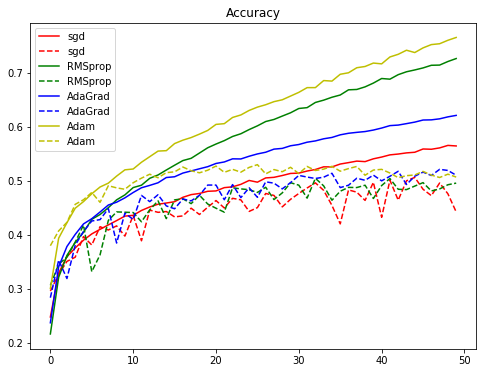

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()